Размер Dataframe:  (10350, 24)
                        NaturalPersonID  ProductName  CreditSum  TypeOfWork  \
0  1ABD801A-0580-4C4F-9682-E7E85A749981            1   500000.0           0   
1  7B427911-9B96-443E-9EBA-76A02515E1BE            1   708000.0           0   
2  4B867BD5-6398-4400-99CA-CF208714AF9A            1   665000.0           0   
3  ED654BFA-A7E7-4280-84CA-D6EAE80E45E2            1   458000.0           0   
4  CCA3FF37-D508-449E-869A-6ED4CB6F9943            1   969000.0           0   

   Employment  SignIP  sex  age  EducationStatus  otrasl_rabotodatelya  ...  \
0           1       0    1   49                5                    18  ...   
1           2       0    1   44                3                     1  ...   
2           1       0    2   29                5                    18  ...   
3           1       0    1   59                6                    13  ...   
4           1       0    2   51                5                     2  ...   

   LivingRegionName

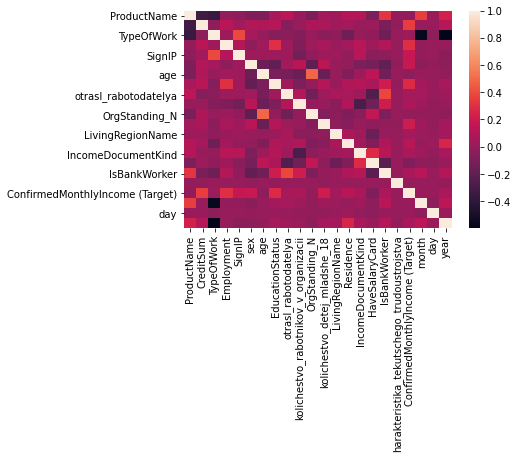

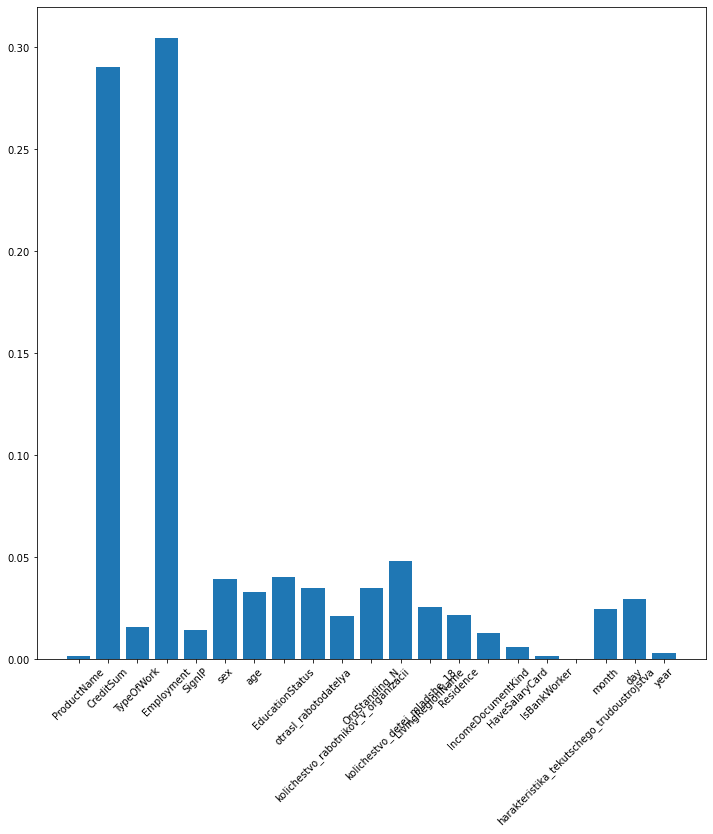

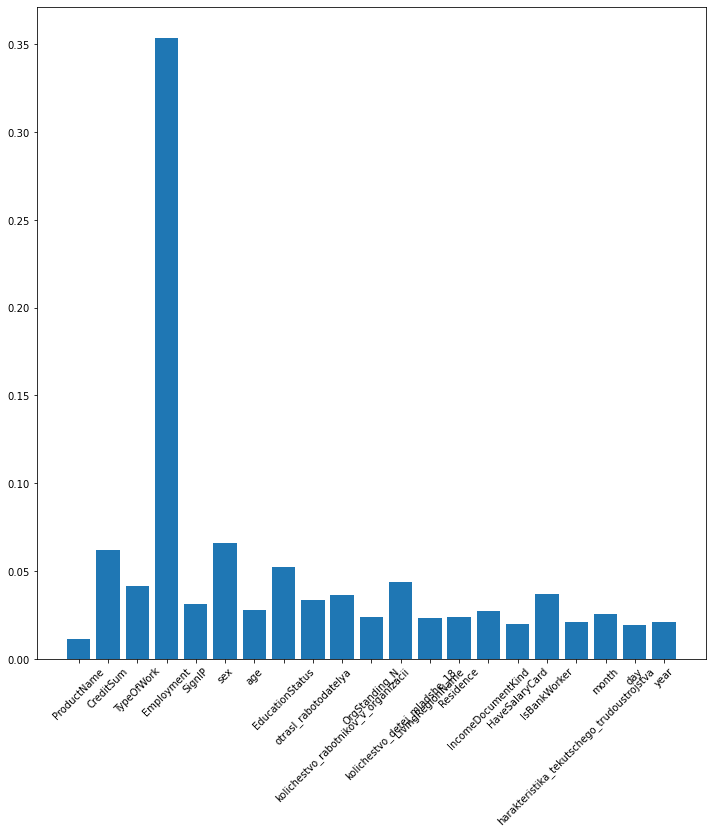

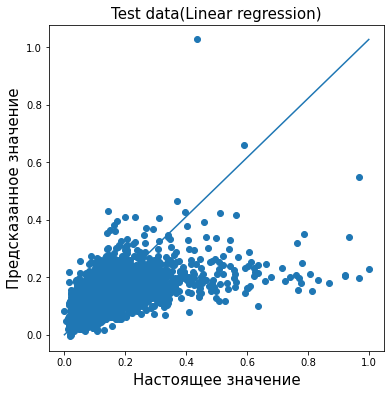

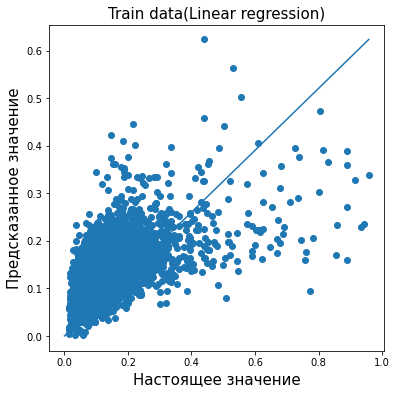

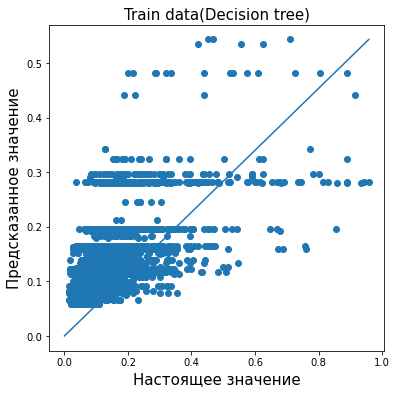

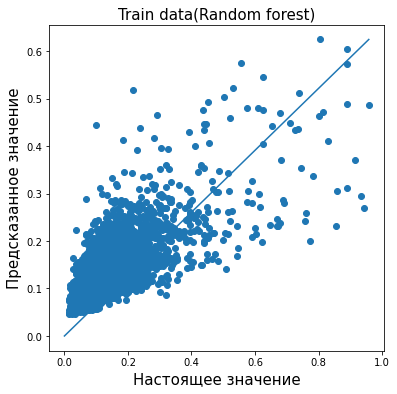

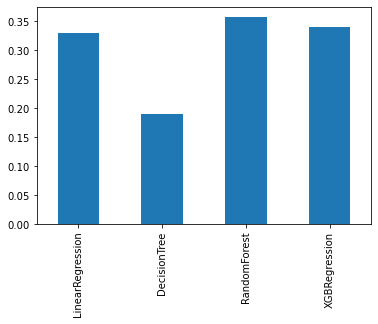

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from pandas import DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import xgboost as xgb

if __name__ == '__main__':
    data = pd.read_csv(r'D:\IIStudy\scientist_project\data\update_data.csv', delimiter=',')

    # Размер дата фрейма
    print('Размер Dataframe: ', data.shape)
    data.drop('Unnamed: 0', inplace=True, axis=1)
    print(data.head(5))

    # Получаем обобщенную информацию о DataFrame
    print('\n\nИнформация о Dataframe df.info():')
    print(data.info())

    numeric_data_with_target = ["ProductName", 'CreditSum', 'Employment', 'sex', 'age', 'EducationStatus',
                                'kolichestvo_rabotnikov_v_organizacii', 'OrgStanding_N', 'kolichestvo_detej_mladshe_18',
                                'Residence', 'HaveSalaryCard', 'IsBankWorker',
                                'harakteristika_tekutschego_trudoustrojstva', 'ConfirmedMonthlyIncome (Target)',
                                'LivingRegionName']

    data = data.drop(['NaturalPersonID'], axis=1)
    print(data.info())
    sn.heatmap(data.corr())

    min_max_scaler = MinMaxScaler()
    data_norm = data.copy()
    data_norm = min_max_scaler.fit_transform(data_norm)

    data_norm = pd.DataFrame(data_norm, columns=data.columns)

    target_name = "ConfirmedMonthlyIncome (Target)"
    target = data_norm[target_name]
    data_norm.drop(target_name, axis=1, inplace=True)

    data_train, data_test, target_values_train, target_values_test = train_test_split(data_norm,
                                                                                      target,
                                                                                      test_size=0.5, train_size=0.5,
                                                                                      random_state=42)
    model_regressor = LinearRegression(n_jobs=5)
    model_regressor.fit(data_train, target_values_train)

    model_tree = DecisionTreeRegressor(random_state=42, max_depth=6, min_samples_split=4, min_samples_leaf=3,
                                       max_features=6)
    model_tree.fit(data_train, target_values_train)

    real_forest = RandomForestRegressor(random_state=42, max_depth=7, n_estimators=50, min_samples_split=4,
                                        min_samples_leaf=4, n_jobs=5)
    real_forest.fit(data_train, target_values_train)

    parametrs = {
        'max_depth': range(1, 20),
        'min_samples_leaf': range(1, 8),
        'min_samples_split': range(2, 6),
        'max_features': range(1, 9)}

    random_forest = RandomForestRegressor()

    random_parametrs = {'n_estimators': range(10, 51, 10),
                        'max_depth': range(1, 9, 2),
                        'min_samples_leaf': range(1, 8),
                        'min_samples_split': range(2, 8, 2)}

    model_xgb = xgb.XGBRegressor(random_state=42,
                                 colsample_bytree=0.8, learning_rate=0.05, max_depth=7, n_estimators=60, nthread=4
                                 )
    print('XGB Regression')
    model_xgb.fit(data_train, target_values_train)

    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for XGB model(test)".format(
        mean_absolute_error(target_values_test, model_xgb.predict(data_test)),
        mean_squared_error(target_values_test, model_xgb.predict(data_test)) ** 0.5,
        r2_score(target_values_test, model_xgb.predict(data_test))))

    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for XGB model(train)".format(
        mean_absolute_error(target_values_train, model_xgb.predict(data_train)),
        mean_squared_error(target_values_train, model_xgb.predict(data_train)) ** 0.5,
        r2_score(target_values_train, model_xgb.predict(data_train))))
    # parameters = {'nthread': [4],
    #               'learning_rate': [0.01, 0.03, 0.05],
    #               'max_depth': [3, 4, 5, 6, 7, 7],
    #               'colsample_bytree': [0.7, 0.8],
    #               'n_estimators': [500]}
    # model_xgb_f = xgb.XGBRegressor()
    # model_xgb_grid = GridSearchCV(model_xgb_f, parameters, cv=5, n_jobs=5, verbose=True)
    # model_xgb_grid.fit(data_train, target_values_train)
    # print(model_xgb_grid.best_params_)
    # model_grid_random_forest = GridSearchCV(random_forest, random_parametrs, cv=5)
    # model_grid_random_forest.fit(data_train, target_values_train)
    # print(model_grid_random_forest.best_params_)

    # model_grid = DecisionTreeRegressor()
    # grid = GridSearchCV(model_grid, parametrs, cv=5)
    # grid.fit(data_train, target_values_train)
    # print(grid.best_params_)

    print('Linear regression')

    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model(test)".format(
        mean_absolute_error(target_values_test, model_regressor.predict(data_test)),
        mean_squared_error(target_values_test, model_regressor.predict(data_test)) ** 0.5,
        r2_score(target_values_test, model_regressor.predict(data_test))))

    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model(train)".format(
        mean_absolute_error(target_values_train, model_regressor.predict(data_train)),
        mean_squared_error(target_values_train, model_regressor.predict(data_train)) ** 0.5,
        r2_score(target_values_train, model_regressor.predict(data_train))))

    print()
    print('DecisionTree')

    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for tree model(test)".format(
        mean_absolute_error(target_values_test, model_tree.predict(data_test)),
        mean_squared_error(target_values_test, model_tree.predict(data_test)) ** 0.5,
        r2_score(target_values_test, model_tree.predict(data_test))))

    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for tree model(train)".format(
        mean_absolute_error(target_values_train, model_tree.predict(data_train)),
        mean_squared_error(target_values_train, model_tree.predict(data_train)) ** 0.5,
        r2_score(target_values_train, model_tree.predict(data_train))))

    print()
    print('Random Tree')

    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for randomTree model(test)".format(
        mean_absolute_error(target_values_test, real_forest.predict(data_test)),
        mean_squared_error(target_values_test, real_forest.predict(data_test)) ** 0.5,
        r2_score(target_values_test, real_forest.predict(data_test))))

    print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for randomTree model(train)".format(
        mean_absolute_error(target_values_train, real_forest.predict(data_train)),
        mean_squared_error(target_values_train, real_forest.predict(data_train)) ** 0.5,
        r2_score(target_values_train, real_forest.predict(data_train))))

    plt.figure(figsize=(12, 12))
    plt.bar(data_norm.columns, real_forest.feature_importances_)
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 12))
    plt.bar(data_norm.columns, model_xgb.feature_importances_)
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(6, 6))
    plt.scatter(target_values_test, model_regressor.predict(data_test))
    plt.plot([0, max(target_values_test)], [0, max(model_regressor.predict(data_test))])
    plt.xlabel('Настоящее значение', fontsize=15)
    plt.ylabel('Предсказанное значение', fontsize=15)
    plt.title('Test data(Linear regression)', fontsize=15)
    plt.show()

    plt.figure(figsize=(6, 6))
    plt.scatter(target_values_train, model_regressor.predict(data_train))
    plt.plot([0, max(target_values_train)], [0, max(model_regressor.predict(data_train))])
    plt.xlabel('Настоящее значение', fontsize=15)
    plt.ylabel('Предсказанное значение', fontsize=15)
    plt.title('Train data(Linear regression)', fontsize=15)

    plt.figure(figsize=(6, 6))
    plt.scatter(target_values_train, model_tree.predict(data_train))
    plt.plot([0, max(target_values_train)], [0, max(model_tree.predict(data_train))])
    plt.xlabel('Настоящее значение', fontsize=15)
    plt.ylabel('Предсказанное значение', fontsize=15)
    plt.title('Train data(Decision tree)', fontsize=15)

    plt.figure(figsize=(6, 6))
    plt.scatter(target_values_train, real_forest.predict(data_train))
    plt.plot([0, max(target_values_train)], [0, max(real_forest.predict(data_train))])
    plt.xlabel('Настоящее значение', fontsize=15)
    plt.ylabel('Предсказанное значение', fontsize=15)
    plt.title('Train data(Random forest)', fontsize=15)

    kfold = 5  # количество подвыборок для валидации
    itog_val = {}  # список для записи результатов кросс валидации разных алгоритмов

    scores = cross_val_score(model_regressor, data_train, target_values_train, cv=kfold)
    itog_val['LinearRegression'] = scores.mean()
    itog_val['DecisionTree'] = cross_val_score(model_tree, data_train, target_values_train, cv=kfold).mean()
    itog_val['RandomForest'] = cross_val_score(real_forest, data_train, target_values_train, cv=kfold).mean()
    itog_val['XGBRegression'] = cross_val_score(model_xgb, data_train, target_values_train, cv=kfold).mean()

    DataFrame.from_dict(data=itog_val, orient='index').plot(kind='bar', legend=False)

    plt.show()